In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
x, y = sklearn.datasets.make_moons(200, noise=0.15)

In [3]:
y

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1])

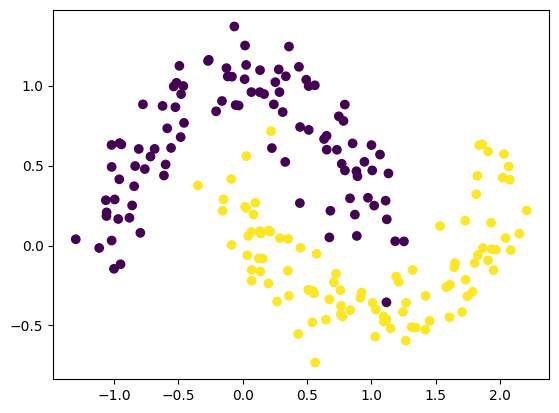

In [4]:
plt.scatter(x[:, 0], x[:, 1],
            c=y)

In [5]:
x.shape

(200, 2)

In [6]:
y.shape

(200,)

In [7]:
input_neurons = 2
output_neurons = 2
samples = x.shape[0]
learning_rate = 0.001
lambda_reg = 0.1

In [8]:
x.shape

(200, 2)

In [9]:
def retreive(model_dict):
    w1 = model_dict["w1"]
    b1 = model_dict["b1"]
    w2 = model_dict["w2"]
    b2 = model_dict["b2"]
    return w1, b1, w2, b2

In [10]:
def forward(x, model_dict):
    w1, b1, w2, b2 = retreive(model_dict)
    z1 = x.dot(w1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(w2) + b2
    a2 = np.tanh(z2)
    exp_scores = np.exp(a2)
    softmax = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return z1, a1, softmax

In [11]:
def loss(softmax, y, model_dict):
    w1, b1, w2, b2 = retreive(model_dict)
    m = np.zeros(200)
    for i,correct_index in enumerate(y):
        predicted = softmax[i][correct_index]
        m[i] = predicted
    log_prob = -np.log(m)
    loss = np.sum(log_prob)
    reg_loss = lambda_reg / 2 * (np.sum(np.square(w1)) + np.sum(np.square(w2)))
    loss+= reg_loss
    return float(loss / y.shape[0])

In [12]:
def predict(x, model_dict):
    w1, b1, w2, b2 = retreive(model_dict)
    z1 = x.dot(w1) + b1
    a1 = np.tanh(Z1)
    ZW = a1.dot(w2) + b2
    a2 = np.tanh(z2)
    exp_scores = np.exp(a2)
    softmax = exp_scores / np.sum(exp_scores, dim=1, keepdims=True)
    return np.argmax(softmax, axis=1)

In [13]:
def backpropagation(x, y, model_dict, epochs):
    for i in range(epochs):
        w1, b1, w2, b2 = retreive(model_dict)
        z1, a1, probs = forward(x, model_dict)    # a1: (200,3), probs: (200,2)
        delta3 = np.copy(probs)
        delta3[range(x.shape[0]), y] -= 1      # (200,2)
        dw2 = (a1.T).dot(delta3)               # (3,2)
        db2 = np.sum(delta3, axis=0, keepdims=True)        # (1,2)
        delta2 = delta3.dot(w2.T) * (1 - np.power(np.tanh(z1), 2))
        dw1 = np.dot(x.T, delta2)
        db1 = np.sum(delta2, axis=0)
        # Add regularization terms
        dw2 += lambda_reg * np.sum(w2)  
        dw1 += lambda_reg * np.sum(w1)  
        # Update Weights: W = W + (-lr*gradient) = W - lr*gradient
        w1 += -learning_rate * dw1
        b1 += -learning_rate * db1
        w2 += -learning_rate * dw2
        b2 += -learning_rate * db2
        # Update the model dictionary
        model_dict = {'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2}
        # Print the loss every 50 epochs
        if i%50 == 0:
            print("Loss at epoch {} is: {:.3f}".format(i,loss(probs, y, model_dict)))
            
    return model_dict

In [14]:
def init_network(input_dim, hidden_dim, output_dim):
    model = {}
    w1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)
    b1 = np.zeros((1, hidden_dim))
    w2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)
    b2 = np.zeros((1, output_dim))
    model["w1"] = w1
    model["b1"] = b1
    model["w2"] = w2
    model["b2"] = b2
    return model

In [15]:
model_dict = init_network(input_dim=input_neurons, hidden_dim=3, output_dim=output_neurons)
model = backpropagation(x, y, model_dict, 300)

Loss at epoch 0 is: 0.843
Loss at epoch 50 is: 0.364
Loss at epoch 100 is: 0.348
Loss at epoch 150 is: 0.350
Loss at epoch 200 is: 0.356
Loss at epoch 250 is: 0.362
